In [1]:
import pymaid
import navis as nv
import matplotlib.pyplot as plt
import time
from navis.interfaces import neuprint as nvneu
from neuroboom import dendrogram as nbd
import neuroboom as nb
import seaborn as sns
import matplotlib.font_manager as fm
fontprops = fm.FontProperties(size=22)
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar

In [2]:
#connect your catmaid instance
instance=pymaid.CatmaidInstance('https://radagast.hms.harvard.edu/catmaidaedes',"<token>")


INFO  : Global CATMAID instance set. Caching is ON. (pymaid)


In [3]:
#get ya neuron
neuron = pymaid.get_neuron(7270)

In [4]:
#get connector IDs
con_details = pymaid.get_connector_details(neuron)
con_details_sub=con_details.explode("postsynaptic_to")
con_details_sub=con_details_sub[con_details_sub["postsynaptic_to"]==11126]


#color dictionary
id_to_color = dict(zip([11126], sns.color_palette('Greens', 1)))

#map to the neuron
connector_id_to_neuron = dict(zip(con_details_sub.connector_id, con_details_sub.postsynaptic_to))
connector_id_to_color = {i : id_to_color[connector_id_to_neuron[i]] for i in con_details_sub.connector_id}

CN details:   0%|          | 0/201 [00:00<?, ?it/s]

INFO  : Data for 201 of 201 unique connector IDs retrieved (pymaid)


Calculating cable length...
Plotting Tree...
Plotting connectors...
Completed in 1s


<Figure size 640x480 with 0 Axes>

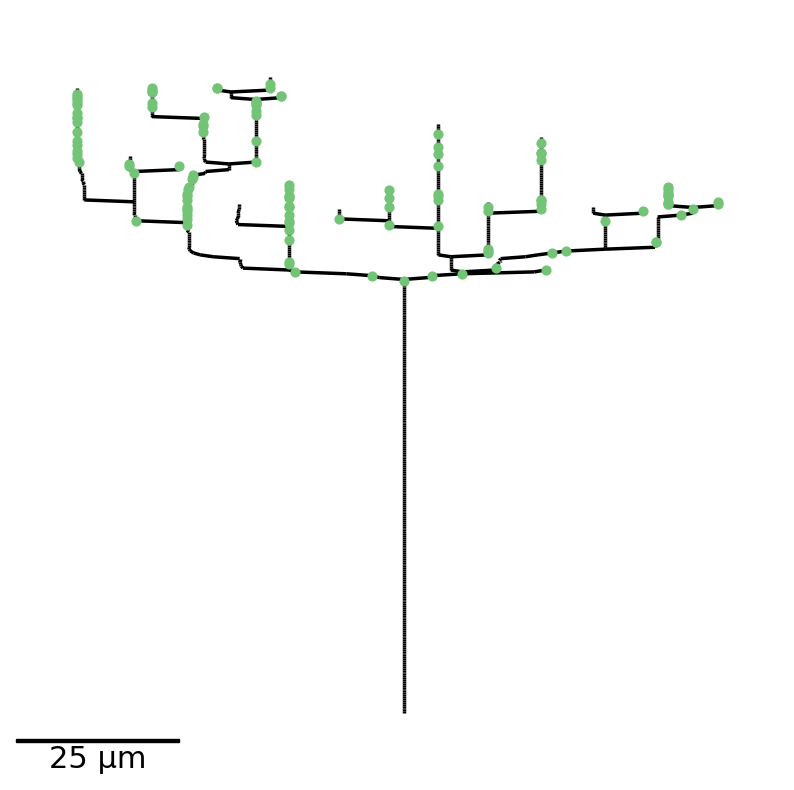

In [5]:
#plot the dendrogram
plt.clf()
fig, ax= plt.subplots(figsize = (10,10))
nbd.plot_dendrogram(neuron, fragment='true', prog='dot', linewidth=2.5, highlight_connectors = connector_id_to_color, highlight_connector_size=40)
scalebar = AnchoredSizeBar(ax.transData, 300, '25 µm', 'lower left', pad=0.1, color='black', frameon=False, size_vertical=100, fontproperties=fontprops)
ax.add_artist(scalebar)
plt.savefig('/home/jb534/pymaid_scripts/aedes/svg/axograms/axogram_md3feedforward.svg', format="svg")
plt.show()

Fetch neurons:   0%|          | 0/10 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


Make nrn:   0%|          | 0/10 [00:00<?, ?it/s]

CN details:   0%|          | 0/201 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Data for 201 of 201 unique connector IDs retrieved (pymaid)


Plotting Tree...
Plotting connectors...
Completed in 1s


<Figure size 640x480 with 0 Axes>

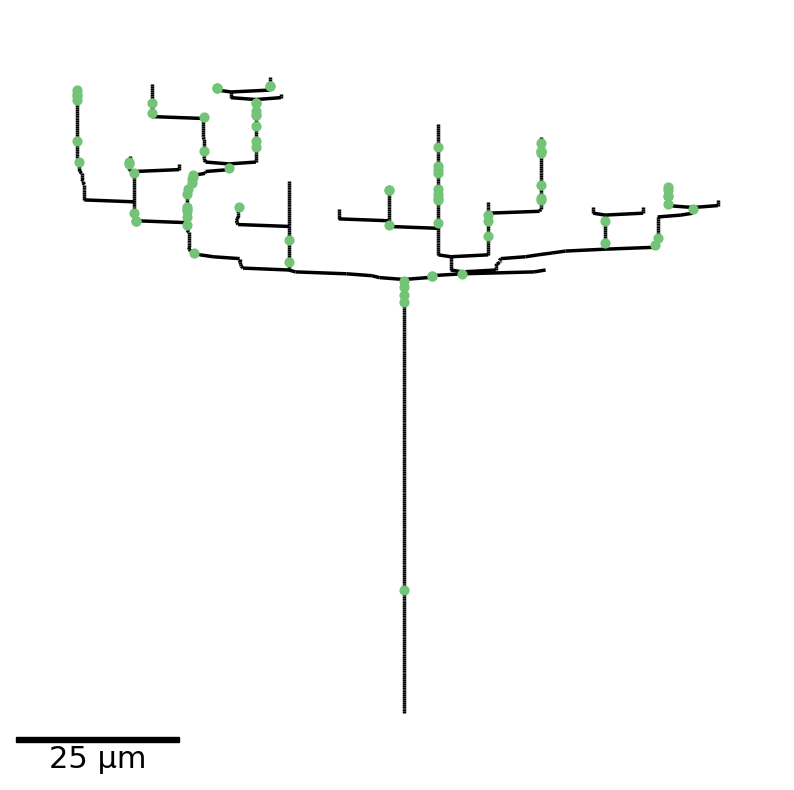

In [6]:
#get recurrent OSNs
MD3OSNs = pymaid.get_skids_by_annotation(['innervates MD3', 'left palp nerve', 'sensory neuron', 'PSPs done'], allow_partial = False, intersect = True)
MD3osns=pymaid.get_neuron(MD3OSNs)

#For recurrent connections, get connector IDs
con_details = pymaid.get_connector_details(neuron)
con_details_sub=con_details.explode("postsynaptic_to")
con_details_recurrent=con_details_sub[con_details_sub["postsynaptic_to"].isin(MD3OSNs)]

#select color and map to dictionary
recurrent_color=sns.color_palette('Greens', 1)*46
recurrent_id_to_color= dict(zip(MD3OSNs, recurrent_color))

#map to the neuron
recurrent_connector_id_to_neuron = dict(zip(con_details_recurrent.connector_id, con_details_recurrent.postsynaptic_to))
recurrent_connector_id_to_color = {i : recurrent_id_to_color[recurrent_connector_id_to_neuron[i]] for i in con_details_recurrent.connector_id}


#plot the dendrogram
plt.clf()
fig, ax= plt.subplots(figsize = (10,10))
nbd.plot_dendrogram(neuron, fragment='true', prog='dot', linewidth=2.5, highlight_connectors = recurrent_connector_id_to_color, highlight_connector_size=40)
scalebar = AnchoredSizeBar(ax.transData, 300, '25 µm', 'lower left', pad=0.1, color='black', frameon=False, size_vertical=200, fontproperties=fontprops)
ax.add_artist(scalebar)
plt.savefig('/home/jb534/pymaid_scripts/aedes/svg/axograms/axogram_md3recurrent.svg', format="svg")
plt.show()
